In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('Crime_Data_from_2010_to_Present.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087209 entries, 0 to 2087208
Data columns (total 28 columns):
DR_NO             int64
Date Rptd         object
DATE OCC          object
TIME OCC          int64
AREA              int64
AREA NAME         object
Rpt Dist No       int64
Part 1-2          int64
Crm Cd            int64
Crm Cd Desc       object
Mocodes           object
Vict Age          int64
Vict Sex          object
Vict Descent      object
Premis Cd         float64
Premis Desc       object
Weapon Used Cd    float64
Weapon Desc       object
Status            object
Status Desc       object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION          object
Cross Street      object
LAT               float64
LON               float64
dtypes: float64(8), int64(7), object(13)
memory usage: 445.9+ MB


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [3]:
#histogram: number of crime
#heat map: busy hour 2014

df["DATE OCC"] = pd.to_datetime(df['DATE OCC'])
df['YEAR']=df["DATE OCC"].dt.year
df['MONTH']=df['DATE OCC'].dt.month
df['Day_of_Week']=df['DATE OCC'].apply(lambda x:x.weekday())
df['HOUR']=df['TIME OCC']//100

Text(0.5, 1.0, 'Number of crimes')

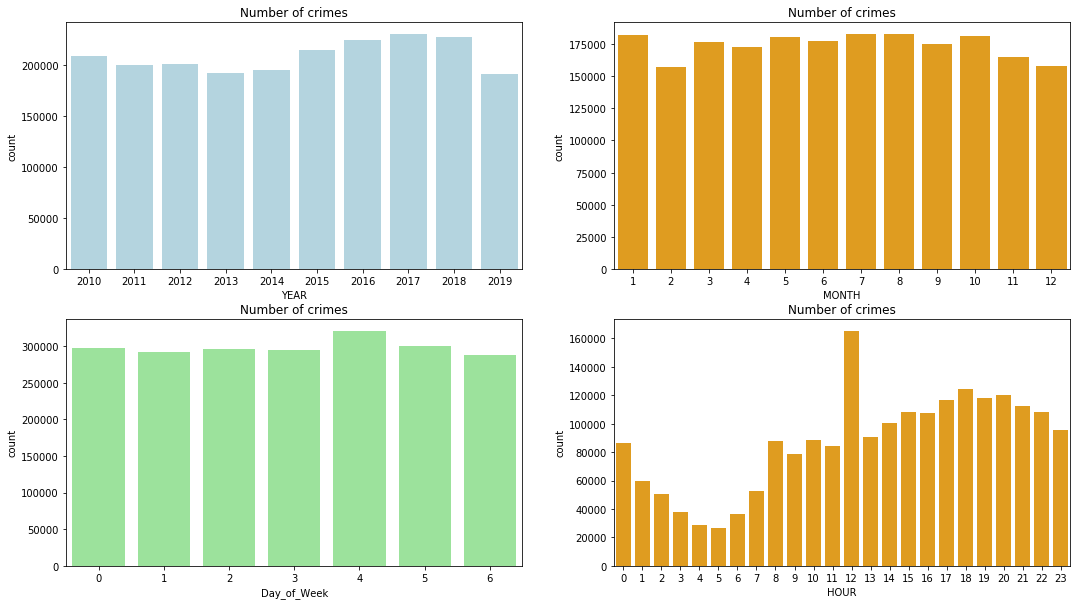

In [5]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 10))


sns.countplot(df["YEAR"], color='lightblue', ax = axes[0,0] )
axes[0,0].set_title("Number of crimes")
sns.countplot(df["Day_of_Week"], color='lightgreen', ax = axes[1,0])
axes[1,0].set_title("Number of crimes")
sns.countplot(df["MONTH"], color = 'orange', ax = axes[0,1])
axes[0,1].set_title("Number of crimes")
sns.countplot(df["HOUR"], color = 'orange', ax = axes[1,1])
axes[1,1].set_title("Number of crimes")

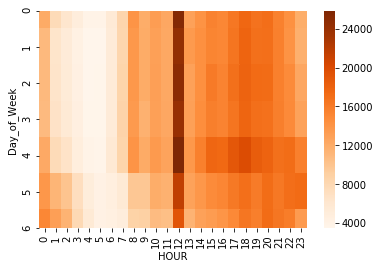

In [6]:
sns.heatmap(pd.pivot_table(data = df, index = "Day_of_Week", 
                              columns = "HOUR", values = "DR_NO", aggfunc = 'count'), 
               cmap = 'Oranges')

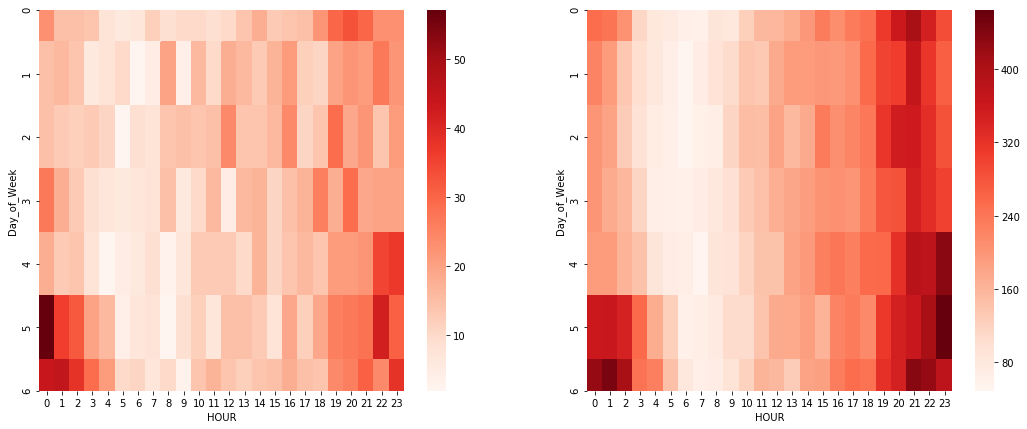

In [7]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7))
sns.heatmap(pd.pivot_table(data = df[df["Crm Cd"] ==(110 or 130)], index = "Day_of_Week", 
                              columns = "HOUR", values = "Crm Cd", aggfunc = 'count'), cmap = 'Reds', ax = axes[0])
sns.heatmap(pd.pivot_table(data = df[df["Weapon Used Cd"] == 102], index = "Day_of_Week", 
                              columns = "HOUR", values = "Weapon Used Cd", aggfunc = 'count'), cmap = 'Reds', ax = axes[1])

In [8]:
tx = pd.read_csv('tax_income.csv')

,Taxable Year,Zip Code,State,City,County,Returns,CA AGI,Total Tax Liability,CountyLatitude,CountyLongitude,Geo County,Geo City,Geo ZipCode
0,2017,91775,CA,San Gabriel,Los Angeles,11301,896920720,39885616,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.10722900000002 34.099203),NaN
1,2017,90001,CA,Los Angeles,Los Angeles,21596,633896704,5884996,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.24915400000002 33.973252)
2,2017,90002,CA,Los Angeles,Los Angeles,19915,576005270,5042436,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.247877 33.949079)
3,2017,91755,CA,Monterey Park,Los Angeles,15063,636889907,19992841,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.127542 34.062407),POINT (-118.11527900000002 34.048584)
4,2017,90213,CA,Beverly Hills,Los Angeles,426,63811566,4916474,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.40467899999999 34.080294),POINT (-118.40467899999999 34.080294)


In [4]:
theaf=set([442,331,420,440])
rob=210
rape=121
murder=110
ch_abuse=set([627,235])
an_abuse=943
filt=set([442,331,420,440,210,121,110,627,235,943])
dff=df[df['Crm Cd'].isin(filt)]
dff=dff[dff['YEAR']==2014]
dff.to_csv('crop_crime_data_2014.csv')

In [20]:
combine= pd.read_csv('combine.csv')
combine=combine.drop(columns='Unnamed: 0')
combine=combine.drop(columns='Unnamed: 0.1')
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40534 entries, 0 to 40533
Data columns (total 33 columns):
DR_NO             40534 non-null int64
Date Rptd         40534 non-null object
DATE OCC          40534 non-null object
TIME OCC          40534 non-null int64
AREA              40534 non-null int64
AREA NAME         40534 non-null object
Rpt Dist No       40534 non-null int64
Part 1-2          40534 non-null int64
Crm Cd            40534 non-null int64
Crm Cd Desc       40534 non-null object
Mocodes           37630 non-null object
Vict Age          40534 non-null int64
Vict Sex          37962 non-null object
Vict Descent      37962 non-null object
Premis Cd         40529 non-null float64
Premis Desc       40529 non-null object
Weapon Used Cd    9725 non-null float64
Weapon Desc       9725 non-null object
Status            40534 non-null object
Status Desc       40534 non-null object
Crm Cd 1          40534 non-null float64
Crm Cd 2          2573 non-null float64
Crm Cd 3         

Text(0.5, 1.0, 'Given children abuse')

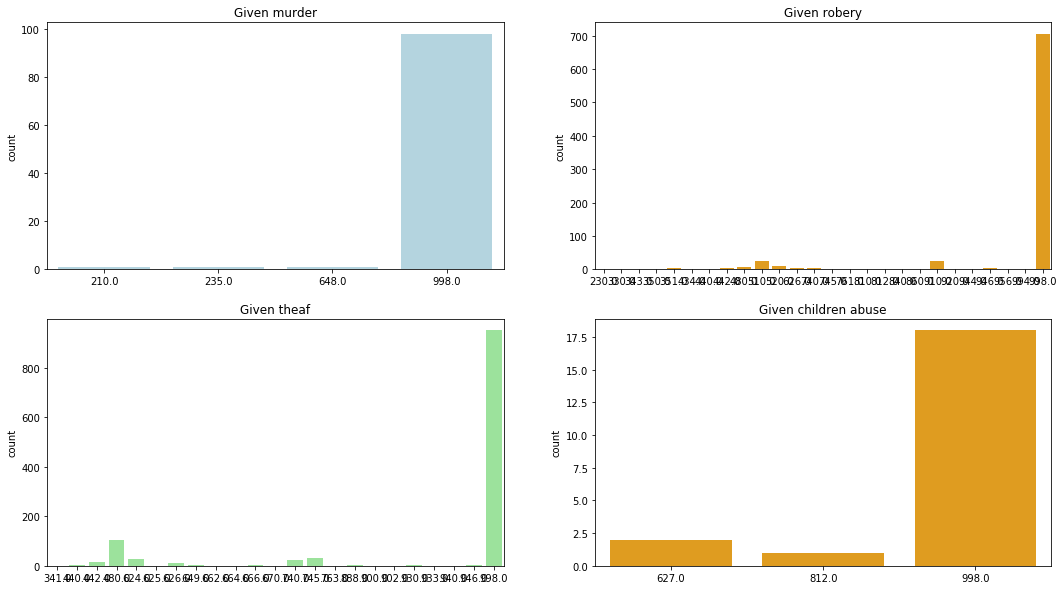

In [34]:
murd=combine[combine['Crm Cd']==murder]
thee=combine[combine['Crm Cd'].isin(theaf)]
robery=combine[combine['Crm Cd']==rob]
child=combine[combine['Crm Cd'].isin(ch_abuse)]

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 10))

murd2=(murd['Crm Cd 2'].append(murd['Crm Cd 3'])).append(murd['Crm Cd 4'])
thee2=(thee['Crm Cd 2'].append(thee['Crm Cd 3'])).append(thee['Crm Cd 4'])
robery2=(robery['Crm Cd 2'].append(robery['Crm Cd 3'])).append(robery['Crm Cd 4'])
child2=(child['Crm Cd 2'].append(child['Crm Cd 3'])).append(child['Crm Cd 4'])

sns.countplot(murd2, color='lightblue', ax = axes[0,0] )
axes[0,0].set_title("Given murder")
sns.countplot(thee2, color='lightgreen', ax = axes[1,0])
axes[1,0].set_title("Given theaf")
sns.countplot(robery2, color = 'orange', ax = axes[0,1])
axes[0,1].set_title("Given robery")
sns.countplot(child2, color = 'orange', ax = axes[1,1])
axes[1,1].set_title("Given children abuse")


In [38]:
tax_income = pd.read_csv("tax_income.csv")
tax_income_2014 = tax_income[tax_income["Taxable Year"] == 2014]
merged = pd.merge(left=combine,right=tax_income_2014, left_on="ZIP_CODE", right_on='Zip Code',how="inner")
merged.head()
merged['Total Tax Liability']=merged['Total Tax Liability']//1000

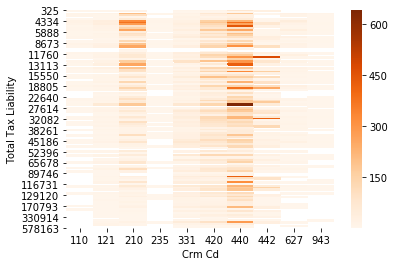

In [40]:
sns.heatmap(pd.pivot_table(data = merged, index = "Total Tax Liability", 
                              columns = "Crm Cd", values = "DR_NO", aggfunc = 'count'), 
               cmap = 'Oranges')